In [13]:
import pandas as pd
import wfdb
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
def load_raw_data(df, path):
    filenames = df['Filename']
    data = [wfdb.rdsamp(path + f)[0] for f in filenames]
    return data


In [15]:
def load_Diag(df, path):
    Dissess_Diag = []
    ECG_Diag = []
    for filename in df['Filename']:
        record = wfdb.rdrecord(path + filename)
        message = record.comments
        Dissess_Diag.append(message[1])
        ECG_Diag.append(message[2])
    return Dissess_Diag, ECG_Diag

In [16]:
path = '/home/luojiawei/dataset/Child_ecg/'
Y = pd.read_csv(path + 'label2.csv')
Y
# path = '/path/to/database/'
# # load CSV
# Y = pd.read_csv(path + 'database.csv')
# Y

,Filename,ECG_ID,Patient_ID,Age,Gender,Admission_date,Discharge_date,Acquisition_date,Sampling_point,Lead,AHA_code,CHN_code,ICD-10
0,P00/P00001/P00001_E01,P00001_E01,P00001,"1y, 6m, 27d",Female,2017-11-21 11:00:00,2017-12-02 09:46:00,2017-11-22 10:46:00,9000,9,Left ventricular high voltage;L147,J106;L123,Q21.000
1,P00/P00002/P00002_E01,P00002_E01,P00002,"11y, 10m, 12d",Male,2017-11-28 14:00:00,2017-12-02 09:44:00,2017-11-28 21:59:00,15000,12,C21,C13,I51.400
2,P00/P00003/P00003_E01,P00003_E01,P00003,"2y, 11m, 27d",Female,2017-11-16 15:00:00,2017-12-01 10:12:00,2017-11-29 16:04:00,10000,12,C21,C13,Q21.000
3,P00/P00004/P00004_E01,P00004_E01,P00004,"6y, 9m, 5d",Male,2017-11-25 12:00:00,2017-12-04 07:57:00,2017-11-30 15:21:00,13000,9,C21,C13,Q21.100
4,P00/P00004/P00004_E02,P00004_E02,P00004,"6y, 9m, 1d",Male,2017-11-25 12:00:00,2017-12-04 07:57:00,2017-11-26 19:19:00,15000,9,A1,A1,Q21.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14185,P11/P11639/P11639_E01,P11639_E01,P11639,"7y, 3m, 1d",Male,2021-06-24 16:00:00,2021-07-03 10:00:00,2021-06-24 18:22:00,10000,12,A1,A1,NaN
14186,P11/P11640/P11640_E01,P11640_E01,P11640,"1y, 9m, 22d",Male,2021-07-01 00:00:00,2021-07-03 10:32:00,2021-07-01 09:47:00,10500,12,C21;L147,C13;L123,NaN
14187,P11/P11641/P11641_E01,P11641_E01,P11641,"4y, 0m, 24d",Female,2021-07-04 18:00:00,2021-07-05 10:44:00,2021-07-04 21:58:00,15000,12,D30+Modifier310,D21+Frequent,NaN
14188,P11/P11642/P11642_E01,P11642_E01,P11642,"14y, 2m, 8d",Male,2021-06-26 14:00:00,2021-07-04 11:04:00,2021-06-27 20:22:00,15000,12,C23;L150,C15;L128,NaN


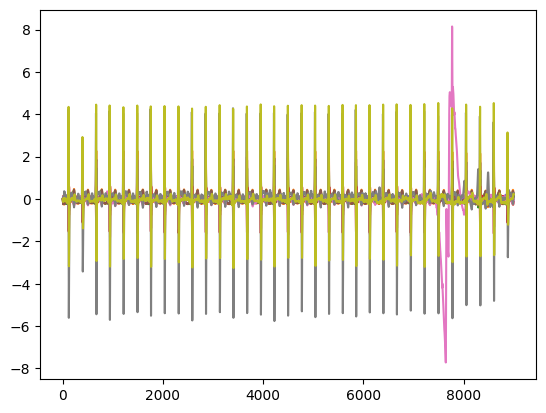

In [17]:
import matplotlib.pyplot as plt
# load row signal data
X = load_raw_data(Y, path)
data = X[0].T
for i in range(data.shape[0]):
    plt.plot(data[i])

In [18]:
import warnings
from ecg_qc.ecg_qc import EcgQc  # https://github.com/Aura-healthcare/ecg_qc
sqi = []
for item in range(data.shape[0]):
    ecg_list = data[item].tolist()
    flattened_ecg = np.ravel(ecg_list)
    warnings.filterwarnings("ignore")
    ecg_qc = EcgQc('rfc_norm_2s.pkl', sampling_frequency=500, normalized=True)
    sqi_scores = np.array(ecg_qc.compute_sqi_scores(flattened_ecg))
    sqi.append(sqi_scores[0])
sqi = np.array(sqi)
mean_sqi = np.mean(sqi,axis=0)
print('The quality of signal: pSQI = {:.3f}, basSQI = {:.3f}'.format(mean_sqi[4], mean_sqi[5]))

The quality of signal: pSQI = 0.318, basSQI = 0.977


In [19]:
# load Disease_Diag and ECG_Diag
Disease_Diag, ECG_Diag = load_Diag(Y, path)
Disease_Diag, ECG_Diag

(['Ventricular septal defect',
  'Myocarditis',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Ventricular septal defect',
  'Ventricular septal defect',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Atrial septal defect',
  'Ventricular septal defect',
  'Pulmonary value stenosis',
  'Myocarditis',
  'Atrial septal defect',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Ventricular septal defect;Atrial septal defect',
  'Kawasaki disease',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Atrial septal defect (Secondary orifice)',
  'Patent ductus arteriosus',
  'Central atrial septal defect (Foramen ovale)',
  'Patent ductus arteriosus',
  'Ventricular septal defect'

In [20]:
# Split data into train val and test
# Get unique Patient_ID values
patient_ids = Y['Patient_ID'].unique()

# Split Patient_IDs into training, validation, and test sets
train_ids, test_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Get indices for training, validation, and test sets based on Patient_ID
train_idx = Y[Y['Patient_ID'].isin(train_ids)].index
val_idx = Y[Y['Patient_ID'].isin(val_ids)].index
test_idx = Y[Y['Patient_ID'].isin(test_ids)].index

# Split X into training, validation, and test sets based on the indices
# Train
X_train = [X[i] for i in train_idx]
Y_train = [Disease_Diag[i] for i in train_idx]
# val
X_val = [X[i] for i in val_idx]
Y_val = [Disease_Diag[i] for i in val_idx]
# test
X_test = [X[i] for i in test_idx]
Y_test = [Disease_Diag[i] for i in test_idx]
print(f'The training set has {len(X_train)} records')
print(f'The val set has {len(X_val)} records')
print(f'The test set has {len(X_test)} records')

The training set has 8486 records
The val set has 2857 records
The test set has 2847 records
